In [ ]:
!pip install --upgrade qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
import qiskit
print(qiskit.__version__)

1.3.3


In [ ]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 21.4 MB/s eta 0:00:00


In [ ]:
pip install qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.2
    Uninstalling pydantic_core-2.27.2:
      Successfully uninstalled pydantic_core-2.27.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.6
    Uninstalling pydantic-2.10.6:
      Successfully uninstalled pydantic-2.10.6


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=acb10fd3f6684ba765a82b1ab6b3d36bf100432ab56de5f440eb9d2c27d4640d
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
#Connect to IBM quantum device

from qiskit_ibm_runtime import QiskitRuntimeService

token = "c4b73ac9299f8c3b9db7a874e17bc234200cd95263f80651a2661e8e2cfc44c723a2fc9aa5661e51c11e6c367a2bf173700cf0cd364cbd87c5bbc7f097f7e126"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum",
  instance='ibm-q-asu/main/tec-german',
  overwrite=True
)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

# Get a specific backend.
backend = service.backend('ibm_fez')

In [ ]:
# Quantum circuit to entangle two logical qubits

from qiskit import QuantumCircuit
from qiskit.circuit.classicalregister import ClassicalRegister
from qiskit.circuit.quantumregister import QuantumRegister

# Define the circuit
num_qubits = 156  # Total number of qubits in the coupling map
qc = QuantumCircuit(num_qubits, 16)  # Create a circuit with quantum and classical registers

# Definition of logical qubits
qubitL_1 = [17, 37, 57, 38]  # Physical qubits forming logical qubit 1
qubitL_2 = [57, 77, 97, 88]  # Physical qubits forming logical qubit 2

# Auxiliary qubits for parity measurement (ancillas)
ancillas_logical_1 = {
    17: [26, 28],
    37: [26, 46],
    38: [28, 48],
    57: [46, 48],
}
ancillas_logical_2 = {
    57: [66, 68],
    77: [66, 86],
    78: [68, 88],
    97: [86, 88],
}

# Preparation of logical qubits
for q in qubitL_1:
    qc.h(q)  # Place each physical qubit in the |+> state
for q in qubitL_2:
    qc.h(q)

# Entangle qubits within each logical group
for i in range(len(qubitL_1) - 1):
    qc.cx(qubitL_1[i], qubitL_1[i + 1])
for i in range(len(qubitL_2) - 1):
    qc.cx(qubitL_2[i], qubitL_2[i + 1])

qc.cx(38, 17)
qc.cx(78, 57)

# Entangle the two logical qubits
qc.cx(17, 57)

# Parity measurement in the Z basis to detect bit-flip errors
def measure_parity_Z(logical, ancillas, bit_start):
    bit_index = bit_start
    for qubit, (a1, a2) in ancillas.items():
        qc.cx(qubit, a1)  # Parity in the Z basis
        qc.cx(qubit, a2)
        qc.measure(a1, bit_index)
        qc.measure(a2, bit_index + 1)
        bit_index += 2

# Bit-flip error correction
def correct_errors_X(logical, ancillas, bit_start):
    bit_index = bit_start
    for qubit, (a1, a2) in ancillas.items():
        qc.x(qubit).c_if(qc.clbits[bit_index], 1)  # Correct if the measurement indicates an error
        qc.x(qubit).c_if(qc.clbits[bit_index + 1], 1)
        bit_index += 2

# Apply parity measurement and bit-flip error correction
measure_parity_Z(qubitL_1, ancillas_logical_1, 0)
measure_parity_Z(qubitL_2, ancillas_logical_2, 8)
#correct_errors_X(qubitL_1, ancillas_logical_1, 0)
#correct_errors_X(qubitL_2, ancillas_logical_2, 8)

# Final measurements
for i, qubit in enumerate(qubitL_1):
    qc.measure(qubit, 8 + i)  # Map logical qubit 1 measurements to the first 4 classical bits
for i, qubit in enumerate(qubitL_2):
    qc.measure(qubit, 12 + i)  # Map logical qubit 2 measurements to the last 4 classical bits

# Draw the final circuit
print(qc.draw("text"))

                                                                            »
  q_0: ─────────────────────────────────────────────────────────────────────»
                                                                            »
  q_1: ─────────────────────────────────────────────────────────────────────»
                                                                            »
  q_2: ─────────────────────────────────────────────────────────────────────»
                                                                            »
  q_3: ─────────────────────────────────────────────────────────────────────»
                                                                            »
  q_4: ─────────────────────────────────────────────────────────────────────»
                                                                            »
  q_5: ─────────────────────────────────────────────────────────────────────»
                                                                

In [ ]:
#Run experiment
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=10000)

#Get results
#result = job.result()[0]

In [ ]:
#Retrieve the complete result
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-asu/main/tec-german',
    token='c4b73ac9299f8c3b9db7a874e17bc234200cd95263f80651a2661e8e2cfc44c723a2fc9aa5661e51c11e6c367a2bf173700cf0cd364cbd87c5bbc7f097f7e126'
)
job = service.job('cyv42zby2gd000886kk0')
job_result = job.result()
job_result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=10000, num_bits=16>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-02-20 15:34:05', stop='2025-02-20 15:34:15', size=10000>)])}, 'version': 2})

In [ ]:
#Save results
pub_result = job_result[0].data.c.get_counts()

file_name = "cyv42zby2gd000886kk0.txt"

with open(file_name, "w") as file:
    for key, value in pub_result.items():
        file.write(f"{key}: {value}\n")

print(f"Saved: '{file_name}'.")

Saved: 'cyv42zby2gd000886kk0.txt'.


Examples for 00 Logical:
('00000000', 89)
('01001000', 1)
('00000000', 49)
('00000000', 38)
('00000000', 93)

Examples for 11 Logical:
('11010111', 6)
('11010111', 1)
('01110111', 1)
('11010111', 22)
('11101011', 54)


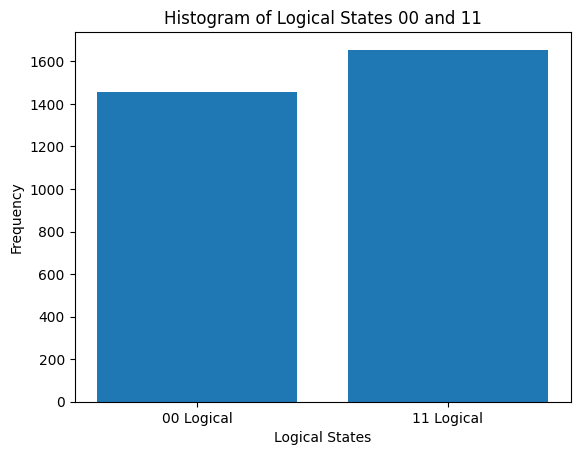

In [ ]:
#Analize the data
import matplotlib.pyplot as plt

# Function to process the file and extract relevant data
def process_bitstrings(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract last 8 bits and their frequencies
    bitstring_data = []
    for line in lines:
        if ":" in line:
            bitstring, frequency = line.strip().split(":")
            last_8_bits = bitstring[-8:]
            frequency = int(frequency)
            bitstring_data.append((last_8_bits, frequency))

    return bitstring_data

# Function to categorize states based on logical criteria
def categorize_states(bitstring_data):
    states_counter = {"00 Logical": 0, "11 Logical": 0}
    for bitstring, frequency in bitstring_data:
        logical_qubit_1 = bitstring[:4]
        logical_qubit_2 = bitstring[4:]

        # Allow at most 1 error per logical qubit
        if logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("0") >= 3:
            states_counter["00 Logical"] += frequency
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("1") >= 3:
            states_counter["11 Logical"] += frequency

    return states_counter

# Function to get examples for each logical state
def get_examples(bitstring_data, max_examples=5):
    examples = {"00 Logical": [], "11 Logical": []}
    for bitstring, frequency in bitstring_data:
        logical_qubit_1 = bitstring[:4]
        logical_qubit_2 = bitstring[4:]

        # Allow at most 1 error per logical qubit
        if logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("0") >= 3:
            if len(examples["00 Logical"]) < max_examples:
                examples["00 Logical"].append((bitstring, frequency))
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("1") >= 3:
            if len(examples["11 Logical"]) < max_examples:
                examples["11 Logical"].append((bitstring, frequency))

    return examples

# Main execution
file_path = '/content/drive/MyDrive/Colab Notebooks/cydysk6cw2k0008ksg90.txt'  # Replace with the correct file path
bitstring_data = process_bitstrings(file_path)
states_counter = categorize_states(bitstring_data)
examples = get_examples(bitstring_data)

# Print examples
print("Examples for 00 Logical:")
for example in examples["00 Logical"]:
    print(example)

print("\nExamples for 11 Logical:")
for example in examples["11 Logical"]:
    print(example)

# Plot the histogram
plt.bar(states_counter.keys(), states_counter.values())
plt.xlabel('Logical States')
plt.ylabel('Frequency')
plt.title('Histogram of Logical States 00 and 11')
plt.show()


Examples for 00 Logical:
('00000000', 111)
('00000000', 136)
('01000100', 2)
('00000000', 124)
('00000000', 87)

Examples for 11 Logical:
('11101011', 67)
('11010111', 82)
('11101011', 69)
('11101011', 60)
('11011110', 1)

Examples for Other:
('10101011', 14)
('10001100', 67)
('00101100', 1)
('11010011', 8)
('10101010', 1)
00 Logical: 1446
11 Logical: 1653
Other: 6901


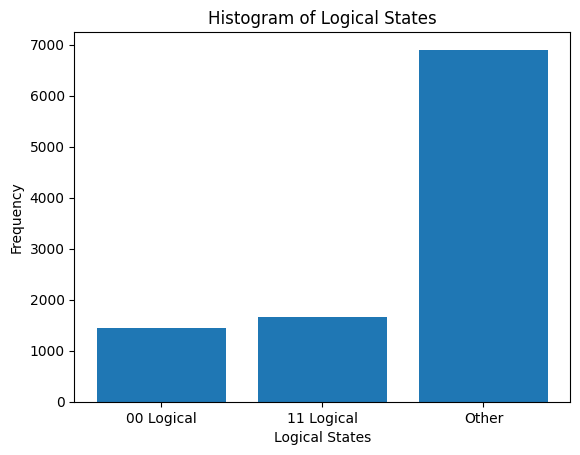

In [ ]:
import matplotlib.pyplot as plt

# Function to process the file and extract relevant data
def process_bitstrings(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract last 8 bits and their frequencies
    bitstring_data = []
    for line in lines:
        if ":" in line:
            bitstring, frequency = line.strip().split(":")
            last_8_bits = bitstring[-8:]
            frequency = int(frequency)
            bitstring_data.append((last_8_bits, frequency))

    return bitstring_data

# Function to categorize states based on logical criteria
def categorize_states(bitstring_data):
    states_counter = {"00 Logical": 0, "11 Logical": 0, "Other": 0}
    for bitstring, frequency in bitstring_data:
        logical_qubit_1 = bitstring[:4]
        logical_qubit_2 = bitstring[4:]

        # Allow at most 1 error per logical qubit
        if logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("0") >= 3:
            states_counter["00 Logical"] += frequency
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("1") >= 3:
            states_counter["11 Logical"] += frequency
        else:
            states_counter["Other"] += frequency

    return states_counter

# Function to get examples for each logical state
def get_examples(bitstring_data, max_examples=5):
    examples = {"00 Logical": [], "11 Logical": [], "Other": []}
    for bitstring, frequency in bitstring_data:
        logical_qubit_1 = bitstring[:4]
        logical_qubit_2 = bitstring[4:]

        # Allow at most 1 error per logical qubit
        if logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("0") >= 3:
            if len(examples["00 Logical"]) < max_examples:
                examples["00 Logical"].append((bitstring, frequency))
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("1") >= 3:
            if len(examples["11 Logical"]) < max_examples:
                examples["11 Logical"].append((bitstring, frequency))
        else:
            if len(examples["Other"]) < max_examples:
                examples["Other"].append((bitstring, frequency))

    return examples

# Main execution
file_path = '/content/drive/MyDrive/Colab Notebooks/cyv42wk4raf0008ek970_noCorrection.txt'  # Replace with the correct file path
bitstring_data = process_bitstrings(file_path)
states_counter = categorize_states(bitstring_data)
examples = get_examples(bitstring_data)

# Print examples
print("Examples for 00 Logical:")
for example in examples["00 Logical"]:
    print(example)

print("\nExamples for 11 Logical:")
for example in examples["11 Logical"]:
    print(example)

print("\nExamples for Other:")
for example in examples["Other"]:
    print(example)

# Plot the histogram
plt.bar(states_counter.keys(), states_counter.values())
plt.xlabel('Logical States')
plt.ylabel('Frequency')
plt.title('Histogram of Logical States')

# Print frequencies
for state, count in states_counter.items():
    print(f"{state}: {count}")

plt.show()


## Estimación de los casos de $Psy+$

Examples for 00 Logical:
('00000000', 111)
('00000000', 136)
('01000100', 2)
('00000000', 124)
('00000000', 87)

Examples for 11 Logical:
('11101011', 67)
('11010111', 82)
('11101011', 69)
('11101011', 60)
('11011110', 1)

Examples for 01 Logical:
('00011111', 2)
('01000111', 2)
('01001011', 7)
('10000111', 2)
('00010111', 13)

Examples for 10 Logical:
('10110000', 66)
('10110000', 72)
('01110000', 1)
('01110000', 8)
('10110000', 104)

Examples for Other:
('10101011', 14)
('10001100', 67)
('00101100', 1)
('11010011', 8)
('10101010', 1)
00 Logical: 1446
11 Logical: 1653
01 Logical: 707
10 Logical: 1039
Other: 5155


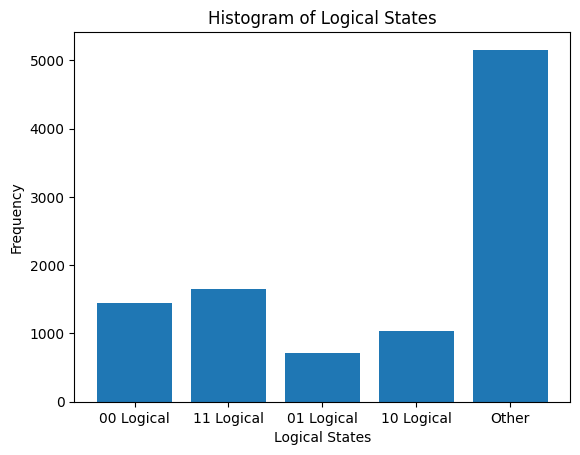

In [ ]:
import matplotlib.pyplot as plt

# Function to process the file and extract relevant data
def process_bitstrings(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract last 8 bits and their frequencies
    bitstring_data = []
    for line in lines:
        if ":" in line:
            bitstring, frequency = line.strip().split(":")
            last_8_bits = bitstring[-8:]
            frequency = int(frequency)
            bitstring_data.append((last_8_bits, frequency))

    return bitstring_data

# Function to categorize states based on logical criteria
def categorize_states(bitstring_data):
    states_counter = {"00 Logical": 0, "11 Logical": 0, "01 Logical": 0, "10 Logical": 0, "Other": 0}
    for bitstring, frequency in bitstring_data:
        logical_qubit_1 = bitstring[:4]
        logical_qubit_2 = bitstring[4:]

        # Allow at most 1 error per logical qubit
        if logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("0") >= 3:
            states_counter["00 Logical"] += frequency
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("1") >= 3:
            states_counter["11 Logical"] += frequency
        elif logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("1") >= 3:
            states_counter["01 Logical"] += frequency
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("0") >= 3:
            states_counter["10 Logical"] += frequency
        else:
            states_counter["Other"] += frequency

    return states_counter

# Function to get examples for each logical state
def get_examples(bitstring_data, max_examples=5):
    examples = {"00 Logical": [], "11 Logical": [], "01 Logical": [], "10 Logical": [], "Other": []}
    for bitstring, frequency in bitstring_data:
        logical_qubit_1 = bitstring[:4]
        logical_qubit_2 = bitstring[4:]

        # Allow at most 1 error per logical qubit
        if logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("0") >= 3:
            if len(examples["00 Logical"]) < max_examples:
                examples["00 Logical"].append((bitstring, frequency))
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("1") >= 3:
            if len(examples["11 Logical"]) < max_examples:
                examples["11 Logical"].append((bitstring, frequency))
        elif logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("1") >= 3:
            if len(examples["01 Logical"]) < max_examples:
                examples["01 Logical"].append((bitstring, frequency))
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("0") >= 3:
            if len(examples["10 Logical"]) < max_examples:
                examples["10 Logical"].append((bitstring, frequency))
        else:
            if len(examples["Other"]) < max_examples:
                examples["Other"].append((bitstring, frequency))

    return examples

# Main execution
file_path = '/content/drive/MyDrive/Colab Notebooks/cyv42wk4raf0008ek970_noCorrection.txt'  # Replace with the correct file path
bitstring_data = process_bitstrings(file_path)
states_counter = categorize_states(bitstring_data)
examples = get_examples(bitstring_data)

# Print examples
print("Examples for 00 Logical:")
for example in examples["00 Logical"]:
    print(example)

print("\nExamples for 11 Logical:")
for example in examples["11 Logical"]:
    print(example)

print("\nExamples for 01 Logical:")
for example in examples["01 Logical"]:
    print(example)

print("\nExamples for 10 Logical:")
for example in examples["10 Logical"]:
    print(example)

print("\nExamples for Other:")
for example in examples["Other"]:
    print(example)

# Plot the histogram
plt.bar(states_counter.keys(), states_counter.values())
plt.xlabel('Logical States')
plt.ylabel('Frequency')
plt.title('Histogram of Logical States')

# Print frequencies
for state, count in states_counter.items():
    print(f"{state}: {count}")

plt.show()

Examples for 00 Logical:
('00000000', 113)
('00000000', 44)
('00000000', 107)
('00000000', 88)
('00000000', 34)

Examples for 11 Logical:
('11101011', 33)
('11010111', 5)
('11010111', 4)
('11010111', 11)
('11101011', 43)

Examples for 01 Logical:
('00101110', 3)
('00010111', 17)
('00100111', 3)
('01001111', 1)
('00011011', 2)

Examples for 10 Logical:
('10110000', 14)
('10110000', 37)
('10110000', 70)
('10110000', 1)
('10110001', 3)
00 Logical: 1590
11 Logical: 1483
01 Logical: 547
10 Logical: 1153


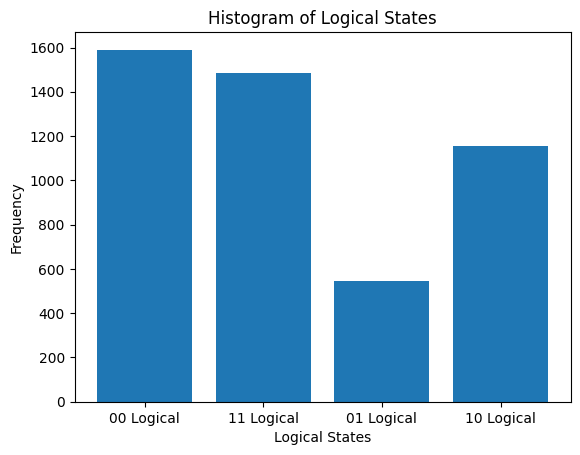

In [ ]:
import matplotlib.pyplot as plt

# Function to process the file and extract relevant data
def process_bitstrings(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract last 8 bits and their frequencies
    bitstring_data = []
    for line in lines:
        if ":" in line:
            bitstring, frequency = line.strip().split(":")
            last_8_bits = bitstring[-8:]
            frequency = int(frequency)
            bitstring_data.append((last_8_bits, frequency))

    return bitstring_data

# Function to categorize states based on logical criteria
def categorize_states(bitstring_data):
    states_counter = {"00 Logical": 0, "11 Logical": 0, "01 Logical": 0, "10 Logical": 0}
    for bitstring, frequency in bitstring_data:
        logical_qubit_1 = bitstring[:4]
        logical_qubit_2 = bitstring[4:]

        # Allow at most 1 error per logical qubit
        if logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("0") >= 3:
            states_counter["00 Logical"] += frequency
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("1") >= 3:
            states_counter["11 Logical"] += frequency
        elif logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("1") >= 3:
            states_counter["01 Logical"] += frequency
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("0") >= 3:
            states_counter["10 Logical"] += frequency

    return states_counter

# Function to get examples for each logical state
def get_examples(bitstring_data, max_examples=5):
    examples = {"00 Logical": [], "11 Logical": [], "01 Logical": [], "10 Logical": []}
    for bitstring, frequency in bitstring_data:
        logical_qubit_1 = bitstring[:4]
        logical_qubit_2 = bitstring[4:]

        # Allow at most 1 error per logical qubit
        if logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("0") >= 3:
            if len(examples["00 Logical"]) < max_examples:
                examples["00 Logical"].append((bitstring, frequency))
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("1") >= 3:
            if len(examples["11 Logical"]) < max_examples:
                examples["11 Logical"].append((bitstring, frequency))
        elif logical_qubit_1.count("0") >= 3 and logical_qubit_2.count("1") >= 3:
            if len(examples["01 Logical"]) < max_examples:
                examples["01 Logical"].append((bitstring, frequency))
        elif logical_qubit_1.count("1") >= 3 and logical_qubit_2.count("0") >= 3:
            if len(examples["10 Logical"]) < max_examples:
                examples["10 Logical"].append((bitstring, frequency))

    return examples

# Main execution
file_path = '/content/drive/MyDrive/Colab Notebooks/cydysmenrmz00086f5yg.txt'  # Replace with the correct file path
bitstring_data = process_bitstrings(file_path)
states_counter = categorize_states(bitstring_data)
examples = get_examples(bitstring_data)

# Print examples
print("Examples for 00 Logical:")
for example in examples["00 Logical"]:
    print(example)

print("\nExamples for 11 Logical:")
for example in examples["11 Logical"]:
    print(example)

print("\nExamples for 01 Logical:")
for example in examples["01 Logical"]:
    print(example)

print("\nExamples for 10 Logical:")
for example in examples["10 Logical"]:
    print(example)

# Plot the histogram
plt.bar(states_counter.keys(), states_counter.values())
plt.xlabel('Logical States')
plt.ylabel('Frequency')
plt.title('Histogram of Logical States')

# Print frequencies
for state, count in states_counter.items():
    print(f"{state}: {count}")

plt.show()

# Fidelidad

In [ ]:
from scipy.linalg import sqrtm

def calculate_fidelity_general(p_phi, p_psi, phi_plus, psi_plus):
    """
    Calculates the fidelity of a mixed state with respect to the ideal state |Phi+>.

    Parameters:
        p_phi (float): Probability of obtaining the state |Phi+>.
        p_psi (float): Probability of obtaining the state |Psi+>.
        phi_plus (np.array): The ideal state |Phi+>.
        psi_plus (np.array): The state |Psi+>.

    Returns:
        float: Fidelity of the mixed state with respect to |Phi+>.
    """
    # Density matrices of the pure states
    sigma_phi = np.outer(phi_plus, phi_plus)
    sigma_psi = np.outer(psi_plus, psi_plus)

    # Mixed state density matrix
    rho = p_phi * sigma_phi + p_psi * sigma_psi

    # Ideal state |Phi+>
    sigma_ideal = np.outer(phi_plus, phi_plus)

    # Calculate the fidelity F(rho, sigma_ideal)
    sqrt_sigma_ideal = sqrtm(sigma_ideal)  # Square root of sigma_ideal
    intermediate = np.dot(sqrt_sigma_ideal, np.dot(rho, sqrt_sigma_ideal))
    sqrt_intermediate = sqrtm(intermediate)  # Square root of the intermediate matrix
    fidelity = np.trace(sqrt_intermediate) ** 2  # Fidelity

    return fidelity

# Define the Bell states |Phi+> and |Psi+>
phi_plus = np.array([1, 0, 0, 1]) / np.sqrt(2)  # |Phi+>
psi_plus = np.array([0, 1, 1, 0]) / np.sqrt(2)  # |Psi+>

# Inputs: probabilities of the states
p_phi = 0.75  # Probability of obtaining |Phi+>
p_psi = 0.25  # Probability of obtaining |Psi+>

# Verify that the probabilities sum to 1
if not np.isclose(p_phi + p_psi, 1.0):
    raise ValueError("The probabilities p_phi and p_psi must sum to 1.")

# Calculate the fidelity
fidelity = calculate_fidelity_general(p_phi, p_psi, phi_plus, psi_plus)
print(f"The fidelity is: {fidelity:.4f}")

The fidelity is: 0.7500


In [ ]:
#Now that it has been validated that the Bell quantum state can be maintained in logical qubits, we proceed to find an algorithm
#that helps us find the best places on the topology to implement them.

#Get the coupling map
print(backend.coupling_map)

[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [3, 16], [4, 3], [4, 5], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [7, 17], [8, 7], [8, 9], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [11, 18], [12, 11], [12, 13], [13, 12], [13, 14], [14, 13], [14, 15], [15, 14], [15, 19], [16, 3], [16, 23], [17, 7], [17, 27], [18, 11], [18, 31], [19, 15], [19, 35], [20, 21], [21, 20], [21, 22], [21, 36], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 37], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 38], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 34], [33, 39], [34, 33], [34, 35], [35, 19], [35, 34], [36, 21], [36, 41], [37, 25], [37, 45], [38, 29], [38, 49], [39, 33], [39, 53], [40, 41], [41, 36], [41, 40], [41, 42], [42, 41], [42, 43], [43, 42], [43, 44], [43, 56], [44, 43], [44, 45], [45, 37], [45, 44], [45, 46], [46, 45], [46, 47], [

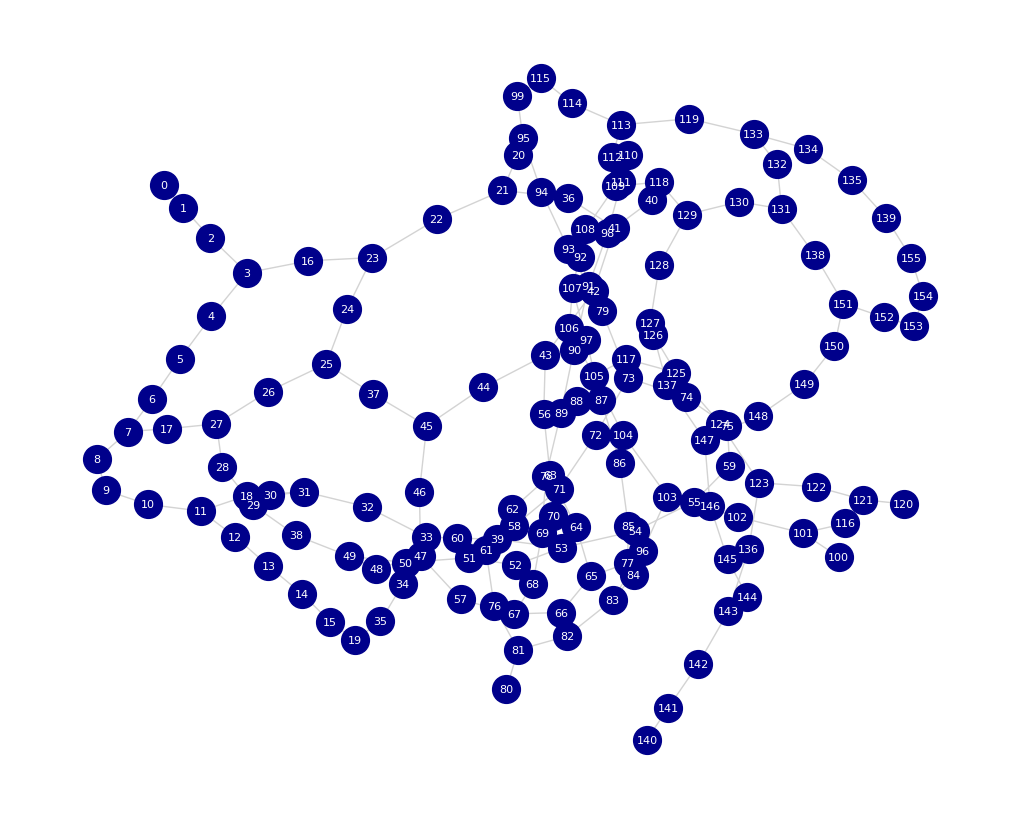

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_coupling_map(coupling_map):
    # Create the graph
    G = nx.Graph()

    # Add edges from the coupling map
    for edge in coupling_map:
        G.add_edge(edge[0], edge[1])

    # Get positions for the nodes in a circular layout
    pos = nx.spring_layout(G, seed=42)  # Using spring layout for better visualization

    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='darkblue', edge_color='lightgray', node_size=400, font_size=8, font_color='white')
    plt.show()

# Example coupling map
coupling_map = backend.coupling_map

# Plot the coupling map
plot_coupling_map(coupling_map)


In [ ]:
from collections import defaultdict

edges = coupling_map

# Create a dictionary to store the graph
graph = defaultdict(set)

# Build the graph from the edges
for node1, node2 in edges:
    graph[node1].add(node2)
    graph[node2].add(node1)

# Convert sets to lists for output
graph = {key: list(value) for key, value in graph.items()}

# Print the graph
print(graph)


{0: [1], 1: [0, 2], 2: [1, 3], 3: [16, 2, 4], 4: [3, 5], 16: [3, 23], 5: [4, 6], 6: [5, 7], 7: [8, 17, 6], 8: [9, 7], 17: [27, 7], 9: [8, 10], 10: [9, 11], 11: [10, 18, 12], 12: [11, 13], 18: [11, 31], 13: [12, 14], 14: [13, 15], 15: [19, 14], 19: [35, 15], 23: [16, 24, 22], 27: [17, 26, 28], 31: [32, 18, 30], 35: [34, 19], 20: [21], 21: [20, 22, 36], 22: [21, 23], 36: [41, 21], 24: [25, 23], 25: [24, 26, 37], 26: [25, 27], 37: [25, 45], 28: [27, 29], 29: [38, 28, 30], 30: [29, 31], 38: [49, 29], 32: [33, 31], 33: [32, 34, 39], 34: [33, 35], 39: [33, 53], 41: [40, 42, 36], 45: [44, 37, 46], 49: [48, 50, 38], 53: [52, 54, 39], 40: [41], 42: [41, 43], 43: [56, 42, 44], 44: [43, 45], 56: [43, 63], 46: [45, 47], 47: [48, 57, 46], 48: [49, 47], 57: [67, 47], 50: [49, 51], 51: [50, 52, 58], 52: [51, 53], 58: [51, 71], 54: [53, 55], 55: [59, 54], 59: [75, 55], 63: [56, 64, 62], 67: [57, 66, 68], 71: [72, 58, 70], 75: [74, 59], 60: [61], 61: [60, 62, 76], 62: [61, 63], 76: [81, 61], 64: [65, 6

In [ ]:
# List to store valid nodes
valid_nodes = []

for node, neighbors in graph.items():
    # Check if the node has exactly 2 connections (candidate for "being in between")
    if len(neighbors) == 2:
        # Verify that both neighbors have a degree of 3
        if all(len(graph[v]) == 3 for v in neighbors):
            # Sort the neighbors to easily check if they are consecutive
            sorted_neighbors = sorted(neighbors)
            # The "continuity" condition is:
            #   If the difference between the larger and smaller neighbor is 2,
            #   then the only intermediate integer is (smaller + 1).
            #   If this value matches the candidate node, it is discarded.
            if not (sorted_neighbors[1] - sorted_neighbors[0] == 2 and node == sorted_neighbors[0] + 1):
                valid_nodes.append(node)

print("Valid nodes:", valid_nodes)


Valid nodes: [16, 17, 18, 36, 37, 38, 39, 56, 57, 58, 76, 77, 78, 79, 96, 97, 98, 116, 117, 118, 119, 136, 137, 138]


In [ ]:
# Input list
data = [16, 17, 18, 36, 37, 38, 39, 56, 57, 58, 76, 77, 78, 79, 96, 97, 98, 116, 117, 118, 119, 136, 137, 138]

# List to store the extracted elements
extracted_elements = []

# Initial index
i = 0

# While there are elements remaining in the list
while i < len(data):
    # Extract the next 3 elements (if less than 3 remain, extract whatever is left)
    extracted_elements.extend(data[i:i+3])
    # Move the index: 3 elements extracted + 4 elements skipped
    i += 3 + 4

# Display the result
print("Extracted elements:", extracted_elements)


Extracted elements: [16, 17, 18, 56, 57, 58, 96, 97, 98, 136, 137, 138]


In [ ]:
# Input array
data = [16, 17, 18, 56, 57, 58, 96, 97, 98, 136, 137, 138]

# Size of each group (in this case, 3) applies only to `fez`
group_size = 3

# Split the array into groups of 3 elements
num_groups = len(data) // group_size
groups = [data[i * group_size:(i + 1) * group_size] for i in range(num_groups)]

# Generate pairs between each consecutive group
pairs = []
for i in range(num_groups - 1):
    for j in range(group_size):
        pair = [groups[i][j], groups[i + 1][j]]
        pairs.append(pair)

# Display the result
print("Generated pairs:")
print(pairs)


Generated pairs:
[[16, 56], [17, 57], [18, 58], [56, 96], [57, 97], [58, 98], [96, 136], [97, 137], [98, 138]]


In [ ]:
from collections import deque

def find_min_cycle(graph, start, required):
    # Each state is a tuple: (current_node, visit_dict, 'required_visit' flag, path)
    # The visit_dict keeps track of how many times each node has been visited.
    initial_state = (start, {start: 1}, (start == required), [start])
    queue = deque([initial_state])

    # To avoid exploring repeated states, we use a set of keys.
    # The key is formed from the current node, the (sorted) visit_dict, and the flag.
    visited_states = set()

    while queue:
        current, visited, found_required, path = queue.popleft()

        # For each neighbor of the current node...
        for neighbor in graph.get(current, []):
            # If 'neighbor' has already been visited twice, we do not use it again.
            if visited.get(neighbor, 0) >= 2:
                continue

            # If the neighbor is the starting node, the path has more than one node,
            # and the 'required' node has already been visited, we have closed the cycle!
            if neighbor == start and len(path) > 1 and found_required:
                return path + [start]

            # Prepare the new state: update visit count and path.
            new_visited = visited.copy()
            new_visited[neighbor] = new_visited.get(neighbor, 0) + 1
            new_found_required = found_required or (neighbor == required)
            new_path = path + [neighbor]

            # Create a state key to avoid exploring repeated states.
            state_key = (neighbor, tuple(sorted(new_visited.items())), new_found_required)
            if state_key in visited_states:
                continue
            visited_states.add(state_key)

            queue.append((neighbor, new_visited, new_found_required, new_path))

    # If no cycle meeting the condition is found, return None.
    return None

# Example: find the cycle that starts at a=16 and passes through b=56.
a = 16
b = 56

cycle = find_min_cycle(graph, a, b)
if cycle:
    print("The minimum cycle that starts at", a, "and passes through", b, "is:")
    print(cycle)
else:
    print("No cycle found for", b)


The minimum cycle that starts at 16 and passes through 56 is:
[16, 23, 24, 25, 37, 45, 44, 43, 56, 43, 42, 41, 36, 21, 22, 23, 16]


In [ ]:
# Define "valid" nodes: those that have exactly 2 neighbors
# and both of their neighbors have exactly 3 connections (degree 3).
valid_nodes = {
    node
    for node, neighbors in graph.items()
    if len(neighbors) == 2 and all(len(graph[neighbor]) == 3 for neighbor in neighbors)
}

# Input array
input_array = [98, 111, 112, 113, 119, 133, 132, 131, 138, 131, 130, 129, 118, 109, 110, 111, 98]

# Convert the array into a set and find the intersection
intersection = valid_nodes.intersection(set(input_array))

print("The intersection is:", intersection)


The intersection is: {98, 130, 132, 138, 110, 112, 118, 119}


Test algoritm for torino device

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

# Get a specific backend.
backend = service.backend('ibm_torino')

In [ ]:
#Now that it has been validated that the Bell quantum state can be maintained in logical qubits, we proceed to find an algorithm
#that helps us find the best places on the topology to implement them.
coupling_map = backend.coupling_map
#Get the coupling map
print(backend.coupling_map)

[[0, 1], [0, 15], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 5], [4, 16], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [8, 7], [8, 9], [8, 17], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [12, 11], [12, 13], [12, 18], [13, 12], [13, 14], [14, 13], [15, 0], [15, 19], [16, 4], [16, 23], [17, 8], [17, 27], [18, 12], [18, 31], [19, 15], [19, 20], [20, 19], [20, 21], [21, 20], [21, 22], [21, 34], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 35], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 36], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 37], [34, 21], [34, 40], [35, 25], [35, 44], [36, 29], [36, 48], [37, 33], [37, 52], [38, 39], [38, 53], [39, 38], [39, 40], [40, 34], [40, 39], [40, 41], [41, 40], [41, 42], [42, 41], [42, 43], [42, 54], [43, 42], [43, 44], [44, 35], [44, 43], [44, 45], [45, 44], [45, 46], [46, 45], [46

In [ ]:
from collections import defaultdict

# Get the list of edges from the coupling map
edges = coupling_map

# Create a dictionary to store the graph
graph = defaultdict(set)

# Build the graph from the edges
for node1, node2 in edges:
    graph[node1].add(node2)
    graph[node2].add(node1)

# Convert sets to lists for output
graph = {key: list(value) for key, value in graph.items()}

# Print the graph
print(graph)


{0: [1, 15], 1: [0, 2], 15: [0, 19], 2: [1, 3], 3: [2, 4], 4: [16, 3, 5], 5: [4, 6], 16: [4, 23], 6: [5, 7], 7: [8, 6], 8: [9, 17, 7], 9: [8, 10], 17: [8, 27], 10: [9, 11], 11: [10, 12], 12: [18, 11, 13], 13: [12, 14], 18: [12, 31], 14: [13], 19: [20, 15], 23: [16, 24, 22], 27: [17, 26, 28], 31: [32, 18, 30], 20: [19, 21], 21: [34, 20, 22], 22: [21, 23], 34: [40, 21], 24: [25, 23], 25: [24, 26, 35], 26: [25, 27], 35: [25, 44], 28: [27, 29], 29: [28, 30, 36], 30: [29, 31], 36: [48, 29], 32: [33, 31], 33: [32, 37], 37: [33, 52], 40: [41, 34, 39], 44: [43, 35, 45], 48: [49, 36, 47], 52: [51, 37], 38: [53, 39], 39: [40, 38], 53: [57, 38], 41: [40, 42], 42: [41, 43, 54], 43: [42, 44], 54: [42, 61], 45: [44, 46], 46: [55, 45, 47], 47: [48, 46], 55: [65, 46], 49: [48, 50], 50: [56, 49, 51], 51: [50, 52], 56: [50, 69], 57: [58, 53], 61: [62, 60, 54], 65: [64, 66, 55], 69: [56, 68, 70], 58: [57, 59], 59: [72, 58, 60], 60: [59, 61], 72: [59, 78], 62: [61, 63], 63: [64, 73, 62], 64: [65, 63], 73:

In [ ]:
# List to store valid nodes
valid_nodes = []

for node, neighbors in graph.items():
    # Check that the node has exactly 2 connections (candidate for "being in between")
    if len(neighbors) == 2:
        # Verify that both neighbors have a degree of 3
        if all(len(graph[v]) == 3 for v in neighbors):
            # Sort neighbors to easily identify if they are consecutive
            sorted_neighbors = sorted(neighbors)
            # The "continuity" condition is:
            #   If the difference between the larger and smaller neighbor is 2,
            #   then the only intermediate integer is (smaller + 1).
            #   If this value matches the candidate node, it is discarded.
            if not (sorted_neighbors[1] - sorted_neighbors[0] == 2 and node == sorted_neighbors[0] + 1):
                valid_nodes.append(node)

print("Valid nodes:", valid_nodes)


Nodos válidos: [16, 17, 18, 34, 35, 36, 54, 55, 56, 72, 73, 74, 92, 93, 94, 110, 111, 112]


In [ ]:
# Input array
data = [16, 17, 18, 34, 35, 36, 54, 55, 56, 72, 73, 74, 92, 93, 94, 110, 111, 112]

# Size of each group (in this case, 6) applies only for "torino"
group_size = 6

# Split the array into groups of 6 elements
num_groups = len(data) // group_size
groups = [data[i * group_size:(i + 1) * group_size] for i in range(num_groups)]

# Generate pairs between each consecutive group
pairs = []
for i in range(num_groups - 1):
    for j in range(group_size):
        pair = [groups[i][j], groups[i + 1][j]]
        pairs.append(pair)

# Display the result
print("Generated pairs:")
print(pairs)


Pares generados:
[[16, 54], [17, 55], [18, 56], [34, 72], [35, 73], [36, 74], [54, 92], [55, 93], [56, 94], [72, 110], [73, 111], [74, 112]]


In [ ]:
from collections import deque

def find_min_cycle(graph, start, required):
    # Each state is a tuple: (current_node, visit_dict, 'required_visit' flag, path)
    # The visit_dict keeps track of how many times each node has been visited.
    initial_state = (start, {start: 1}, (start == required), [start])
    queue = deque([initial_state])

    # To avoid exploring repeated states, we use a set of keys.
    # The key is formed from the current node, the (sorted) visit_dict, and the flag.
    visited_states = set()

    while queue:
        current, visited, found_required, path = queue.popleft()

        # For each neighbor of the current node...
        for neighbor in graph.get(current, []):
            # If 'neighbor' has already been visited twice, we do not use it again.
            if visited.get(neighbor, 0) >= 2:
                continue

            # If the neighbor is the starting node, the path has more than one node,
            # and the 'required' node has already been visited, we have closed the cycle!
            if neighbor == start and len(path) > 1 and found_required:
                return path + [start]

            # Prepare the new state: update visit count and path.
            new_visited = visited.copy()
            new_visited[neighbor] = new_visited.get(neighbor, 0) + 1
            new_found_required = found_required or (neighbor == required)
            new_path = path + [neighbor]

            # Create a state key to avoid exploring repeated states.
            state_key = (neighbor, tuple(sorted(new_visited.items())), new_found_required)
            if state_key in visited_states:
                continue
            visited_states.add(state_key)

            queue.append((neighbor, new_visited, new_found_required, new_path))

    # If no cycle meeting the condition is found, return None.
    return None

# Example: find the cycle that starts at a=16 and passes through b=54.
a = 16
b = 54

cycle = find_min_cycle(graph, a, b)
if cycle:
    print("The minimum cycle that starts at", a, "and passes through", b, "is:")
    print(cycle)
else:
    print("No cycle found for", b)


El ciclo mínimo que inicia por 16 y acaba en 54 es:
[16, 23, 24, 25, 35, 44, 43, 42, 54, 42, 41, 40, 34, 21, 22, 23, 16]


In [ ]:
# Define "valid" nodes: those that have exactly 2 neighbors
# and both of their neighbors have exactly 3 connections (degree 3).
valid_nodes = {
    node
    for node, neighbors in graph.items()
    if len(neighbors) == 2 and all(len(graph[neighbor]) == 3 for neighbor in neighbors)
}

# Input array
input_array = cycle

# Convert the array into a set and find the intersection
intersection = valid_nodes.intersection(set(input_array))

print("The intersection is:", intersection)


La intersección es: {34, 35, 41, 43, 16, 54, 22, 24}


# Multiple lattice two-entanglement logical qubits over the ibm_fez topology

In [ ]:
#Connect to IBM quantum device

from qiskit_ibm_runtime import QiskitRuntimeService

token = "c4b73ac9299f8c3b9db7a874e17bc234200cd95263f80651a2661e8e2cfc44c723a2fc9aa5661e51c11e6c367a2bf173700cf0cd364cbd87c5bbc7f097f7e126"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum",
  instance='ibm-q-asu/main/tec-german',
  overwrite=True
)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

# Get a specific backend.
backend = service.backend('ibm_fez')

In [ ]:
# Multiple lattice two-entanglement logical qubits over the ibm_fez topology

from qiskit import QuantumCircuit
from qiskit.circuit.classicalregister import ClassicalRegister
from qiskit.circuit.quantumregister import QuantumRegister

# Define the circuit
num_qubits = 156  # Total number of qubits in the coupling map
qc = QuantumCircuit(num_qubits, 71)  # Create a circuit with quantum and classical registers

# Definition of logical qubits
qubitL_1 = [17, 37, 57, 38]  # Physical qubits forming logical qubit 1
qubitL_2 = [57, 77, 97, 88]  # Physical qubits forming logical qubit 2

qubitL_3 = [16, 36, 37, 56]  # Physical qubits forming logical qubit 3
qubitL_4 = [56, 76, 77, 96]  # Physical qubits forming logical qubit 4

qubitL_5 = [18, 39, 38, 58]  # Physical qubits forming logical qubit 5
qubitL_6 = [58, 79, 78, 98]  # Physical qubits forming logical qubit 6

# Auxiliary qubits for parity measurement (ancillas)
ancillas_logical_1 = {
    17: [26, 28],
    37: [26, 46],
    38: [28, 48],
    57: [46, 48],
}
ancillas_logical_2 = {
    57: [66, 68],
    77: [66, 86],
    78: [68, 88],
    97: [86, 88],
}
ancillas_logical_3 = {
    16: [22, 24],
    36: [22, 42],
    37: [24, 44],
    56: [42, 44],
}
ancillas_logical_4 = {
    56: [62, 64],
    76: [62, 82],
    77: [64, 84],
    96: [82, 84],
}
ancillas_logical_5 = {
    18: [30, 32],
    38: [30, 50],
    39: [32, 52],
    58: [50, 52],
}
ancillas_logical_6 = {
    58: [70, 72],
    78: [70, 90],
    79: [72, 92],
    98: [90, 92],
}

############################################## start: qubitL_1 and qubitL_2 entanglement ##############################################
# Preparation of logical qubits
for q in qubitL_1:
    qc.h(q)  # Place each physical qubit in the |+> state
for q in qubitL_2:
    qc.h(q)

# Entangle qubits within each logical group
for i in range(len(qubitL_1) - 1):
    qc.cx(qubitL_1[i], qubitL_1[i + 1])
for i in range(len(qubitL_2) - 1):
    qc.cx(qubitL_2[i], qubitL_2[i + 1])

qc.cx(38, 17)
qc.cx(78, 57)

# Entangle the two logical qubits
qc.cx(17, 57)

############################################## end: qubitL_1 and qubitL_2 entanglement ##############################################

############################################## start: qubitL_3 and qubitL_4 entanglement ##############################################
# Preparation of logical qubits
for q in qubitL_3:
    qc.h(q)  # Place each physical qubit in the |+> state
for q in qubitL_4:
    qc.h(q)

# Entangle qubits within each logical group
for i in range(len(qubitL_3) - 1):
    qc.cx(qubitL_3[i], qubitL_3[i + 1])
for i in range(len(qubitL_4) - 1):
    qc.cx(qubitL_4[i], qubitL_4[i + 1])

qc.cx(37, 16)
qc.cx(77, 56)

# Entangle the two logical qubits
qc.cx(16, 56)

############################################## end: qubitL_3 and qubitL_4 entanglement ##############################################

############################################## start: qubitL_5 and qubitL_6 entanglement ##############################################
# Preparation of logical qubits
for q in qubitL_5:
    qc.h(q)  # Place each physical qubit in the |+> state
for q in qubitL_6:
    qc.h(q)

# Entangle qubits within each logical group
for i in range(len(qubitL_5) - 1):
    qc.cx(qubitL_5[i], qubitL_5[i + 1])
for i in range(len(qubitL_4) - 1):
    qc.cx(qubitL_6[i], qubitL_6[i + 1])

qc.cx(39, 18)
qc.cx(79, 58)

# Entangle the two logical qubits
qc.cx(18, 58)

############################################## end: qubitL_5 and qubitL_6 entanglement ##############################################

############################################## def measuments/correction ##############################################
# Parity measurement in the Z basis to detect bit-flip errors
def measure_parity_Z(logical, ancillas, bit_start):
    bit_index = bit_start
    for qubit, (a1, a2) in ancillas.items():
        qc.cx(qubit, a1)  # Parity in the Z basis
        qc.cx(qubit, a2)
        qc.measure(a1, bit_index)
        qc.measure(a2, bit_index + 1)
        bit_index += 2

# Bit-flip error correction
def correct_errors_X(logical, ancillas, bit_start):
    bit_index = bit_start
    for qubit, (a1, a2) in ancillas.items():
        qc.x(qubit).c_if(qc.clbits[bit_index], 1)  # Correct if the measurement indicates an error
        qc.x(qubit).c_if(qc.clbits[bit_index + 1], 1)
        bit_index += 2

############################################## /def measuments/correction ##############################################

############################################## start measurements/correction: qubitL_1 and qubitL_2  ##############################################
# Apply parity measurement and bit-flip error correction
measure_parity_Z(qubitL_1, ancillas_logical_1, 0)
measure_parity_Z(qubitL_2, ancillas_logical_2, 8)
correct_errors_X(qubitL_1, ancillas_logical_1, 0)
correct_errors_X(qubitL_2, ancillas_logical_2, 8)

# Final measurements
for i, qubit in enumerate(qubitL_1):
    qc.measure(qubit, 48 + i)
for i, qubit in enumerate(qubitL_2):
    qc.measure(qubit, 52 + i)
############################################## end measurements/correction: qubitL_1 and qubitL_2  ##############################################

############################################## start measurements/correction: qubitL_3 and qubitL_4  ##############################################
# Apply parity measurement and bit-flip error correction
measure_parity_Z(qubitL_3, ancillas_logical_3, 16)
measure_parity_Z(qubitL_4, ancillas_logical_4, 24)
correct_errors_X(qubitL_3, ancillas_logical_3, 16)
correct_errors_X(qubitL_4, ancillas_logical_4, 24)

# Final measurements
for i, qubit in enumerate(qubitL_1):
    qc.measure(qubit, 55 + i)
for i, qubit in enumerate(qubitL_2):
    qc.measure(qubit, 59 + i)
############################################## end measurements/correction: qubitL_3 and qubitL_4  ##############################################

############################################## start measurements/correction: qubitL_5 and qubitL_6  ##############################################
# Apply parity measurement and bit-flip error correction
measure_parity_Z(qubitL_1, ancillas_logical_1, 32)
measure_parity_Z(qubitL_2, ancillas_logical_2, 40)
correct_errors_X(qubitL_1, ancillas_logical_1, 32)
correct_errors_X(qubitL_2, ancillas_logical_2, 40)

# Final measurements
for i, qubit in enumerate(qubitL_1):
    qc.measure(qubit, 63 + i)
for i, qubit in enumerate(qubitL_2):
    qc.measure(qubit, 67 + i)
############################################## end measurements/correction: qubitL_5 and qubitL_6  ##############################################


# Draw the final circuit
print(qc.draw("text"))

<ipython-input-5-ad071f7a00c0>:137: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qubit).c_if(qc.clbits[bit_index], 1)  # Correct if the measurement indicates an error
<ipython-input-5-ad071f7a00c0>:138: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qubit).c_if(qc.clbits[bit_index + 1], 1)


                                                                           »
  q_0: ────────────────────────────────────────────────────────────────────»
                                                                           »
  q_1: ────────────────────────────────────────────────────────────────────»
                                                                           »
  q_2: ────────────────────────────────────────────────────────────────────»
                                                                           »
  q_3: ────────────────────────────────────────────────────────────────────»
                                                                           »
  q_4: ────────────────────────────────────────────────────────────────────»
                                                                           »
  q_5: ────────────────────────────────────────────────────────────────────»
                                                                           »

In [ ]:
#Run experiment
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=10000)

# Quantum circuit for parity measument

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Create the circuit with 4 physical qubits and 3 classical bits for parities
qc = QuantumCircuit(4, 3)

# Initialize the logical state |0000⟩ (for example)
# Nothing to do, the initial state is |0⟩
# Calculate the Z parity between Q0 and Q1 (first pair)
qc.cx(0, 1)  # CNOT gate to measure parity between Q0 and Q1
qc.measure(1, 0)

# Calculate the Z parity between Q2 and Q3 (second pair)
qc.cx(2, 3)  # CNOT gate to measure parity between Q2 and Q3
qc.measure(3, 1)

# Calculate the Z parity between Q0 and Q2 (interleaved pairs)
qc.cx(0, 2)  # CNOT gate to check parity across pairs to detect bit flips
qc.measure(2, 2)

# Draw the circuit
qc.draw('text')

┌───┐                
q_0: ┤ X ├──■───────■─────
     ├───┤┌─┴─┐┌─┐  │     
q_1: ┤ X ├┤ X ├┤M├──┼─────
     ├───┤└───┘└╥┘┌─┴─┐┌─┐
q_2: ┤ X ├──■───╫─┤ X ├┤M├
     ├───┤┌─┴─┐ ║ └┬─┬┘└╥┘
q_3: ┤ X ├┤ X ├─╫──┤M├──╫─
     └───┘└───┘ ║  └╥┘  ║ 
c: 3/═══════════╩═══╩═══╩═
                0   1   2